In [1]:
#importing dependencies 
import pandas as pd
from pathlib import Path 
import seaborn as sns
#import tensorflow as tf

In [2]:
#File path for PLACES__ZCTA_Data__GIS_Friendly_Format___2023_release.csv
zcta_path= Path("resources/PLACES__ZCTA_Data__GIS_Friendly_Format___2023_release.csv")

In [3]:
#Pandas Dataframe for our imported csv 
med_df = pd.read_csv(zcta_path)
med_df.head()

,ZCTA5,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,BINGE_CrudePrev,BINGE_Crude95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,...,COGNITION_Crude95CI,MOBILITY_CrudePrev,MOBILITY_Crude95CI,SELFCARE_CrudePrev,SELFCARE_Crude95CI,INDEPLIVE_CrudePrev,INDEPLIVE_Crude95CI,DISABILITY_CrudePrev,DISABILITY_Crude95CI,Geolocation
0,1001,16769,4.1,"( 3.4, 5.0)",33.7,"(30.1, 37.4)",15.6,"(13.2, 18.2)",33.8,"(30.2, 37.4)",...,"(11.7, 15.2)",14.3,"(12.3, 16.4)",3.5,"( 3.0, 3.9)",7.6,"( 6.6, 8.8)",31.5,"(28.1, 35.3)",POINT (-72.62581515 42.06255509)
1,1002,29049,4.7,"( 3.9, 5.6)",18.9,"(16.4, 21.6)",17.3,"(14.5, 20.5)",20.6,"(18.0, 23.5)",...,"(14.1, 18.5)",9.2,"( 8.0, 10.5)",2.9,"( 2.6, 3.2)",7.8,"( 6.9, 8.9)",26.5,"(23.2, 30.2)",POINT (-72.4509085 42.38758794)
2,1003,10372,6.9,"( 5.8, 8.3)",5.5,"( 4.4, 6.7)",19.3,"(16.0, 22.9)",9.4,"( 7.7, 11.3)",...,"(26.6, 33.2)",4.0,"( 3.4, 4.6)",2.2,"( 1.9, 2.5)",13.2,"(11.6, 14.8)",35.2,"(30.7, 39.7)",POINT (-72.52475918 42.39190728)
3,1005,5079,3.8,"( 2.9, 4.9)",26.4,"(23.6, 29.6)",17.4,"(15.1, 20.0)",28.0,"(25.1, 31.0)",...,"(11.1, 15.1)",10.7,"( 9.0, 12.6)",2.9,"( 2.5, 3.4)",6.4,"( 5.4, 7.6)",24.9,"(21.8, 28.5)",POINT (-72.10611705 42.42009493)
4,1007,14649,3.3,"( 2.6, 4.1)",25.2,"(21.7, 28.7)",18.1,"(15.2, 21.4)",24.5,"(21.2, 28.0)",...,"( 9.2, 12.3)",9.4,"( 7.9, 11.0)",2.5,"( 2.2, 2.9)",5.4,"( 4.6, 6.2)",21.3,"(18.2, 24.6)",POINT (-72.40031647 42.27869142)


In [4]:
# Get Independent Variable Data
test_df = pd.read_csv("resources/AGI+coords_data.csv")

# As per the Metric Definitions, all money columns here are in thousands of dollars

# Also dropped 3 rows because some ZIPs didn't have coordinates, apparently. Columns renamed for personal convenience
test_df = test_df.drop(["Unnamed: 0", "index"], axis=1).dropna(axis="index", how="any").rename(columns={"N2":"Total Individuals", "A02650":"Total Income Amount"})
test_df

,STATE,ZIPCODE,Total Individuals,Total Income Amount,Total Income per Individual,lng,lat
0,MS,38738,140.0,5.770000e+02,4.121429,-90.53653,33.93049
1,MO,64147,280.0,1.591000e+03,5.682143,-94.54688,38.85387
2,SD,57794,390.0,3.206000e+03,8.220513,-102.40695,43.12071
3,TN,37140,390.0,3.239000e+03,8.305128,-87.65245,35.86345
4,MT,59444,270.0,2.321000e+03,8.596297,-111.34881,48.65227
...,...,...,...,...,...,...,...
27637,CA,94301,14750.0,1.527798e+07,1035.795390,-122.14992,37.44424
27638,CA,94027,5820.0,6.971688e+06,1197.884536,-122.20313,37.45399
27639,FL,33480,9050.0,1.466156e+07,1620.061768,-80.04075,26.69796
27640,CA,94104,1510.0,2.990505e+06,1980.466887,-122.40211,37.79144


In [5]:
# We'll ignore any of the CI columns and keep the ZCTA5 column, so there should be 31 columns left

# Extract all Prevalence columns
prev_df = med_df.filter(like="Prev")

# Can't forget to get the ZIP Code data or else there would be nothing to merge on
prev_df.insert(0, "ZIPCODE", med_df.loc[:, "ZCTA5"])

# Drop nulls
a_df = prev_df.dropna(axis="index", how="any")

# Join data on ZIP Codes, drop nulls again just in case, and rename them for presentation purposes
medical_df = test_df.merge(a_df, how="left", on="ZIPCODE").dropna(axis="index", how="any")\
.rename(columns=
        {# Health Outcomes
         "ARTHRITIS_CrudePrev":"Arthritis", "BPHIGH_CrudePrev":"High Blood Pressure", "CANCER_CrudePrev":"(Non-Skin) Cancer", 
         "CASTHMA_CrudePrev":"Current Asthma", "CERVICAL_CrudePrev":"Cervical Cancer (Adult Women)", "CHD_CrudePrev":"Coronary Heart Disease",
         "COPD_CrudePrev":"Chronic Obstructive Pulmonary Disease", "DEPRESSION_CrudePrev":"Depression", "DIABETES_CrudePrev":"Diabetes",
         "HIGHCHOL_CrudePrev":"High Cholesterol", "KIDNEY_CrudePrev":"Chronic Kidney Disease", "OBESITY_CrudePrev":"Obesity", "STROKE_CrudePrev":"Stroke", "TEETHLOST_CrudePrev":"All Teeth Lost (Older Adults)",
         # Prevention 
         "ACCESS2_CrudePrev":"Lacking Health Insurance", "BPMED_CrudePrev":"Taking Medicine for High Blood Pressure",
         "CHECKUP_CrudePrev":"Routine Health Checkups", "CHOLSCREEN_CrudePrev":"Cholesterol Screening", 
         "COLON_SCREEN_CrudePrev":"FOBT/Colon Screening (Older Adults)",  "COREM_CrudePrev":"Core Clinical Prevention (Older Men)", "COREW_CrudePrev":"Core Clinical Prevention (Older Women)",
         "DENTAL_CrudePrev":"Dentist Visits", "MAMMOUSE_CrudePrev":"Mammography (Older Women)",
         # Health Risk Behaviors
         "BINGE_CrudePrev":"Binge Drinking", "CSMOKING_CrudePrev":"Currently Smoking", "LPA_CrudePrev":"No Leisure-Time Physical Activity",
         "SLEEP_CrudePrev":"Less than 7 Hours of Sleep", 
         # Health Status
         "GHLTH_CrudePrev":"'Fair' or 'Poor' Self-Rated Health Status", "MHLTH_CrudePrev":"'Poor' Self-Rated Mental Health Status", 
         "PHLTH_CrudePrev":"'Poor' Self-Rated Physical Health Status"
        })

# Note: Each of the Health Outcomes columns is the "Crude Prevalence" of that particular health phenomenon
# Note: Unless mentioned otherwise, these stats are measured for adults
medical_df

,STATE,ZIPCODE,Total Individuals,Total Income Amount,Total Income per Individual,lng,lat,Lacking Health Insurance,Arthritis,Binge Drinking,...,Less than 7 Hours of Sleep,Stroke,All Teeth Lost (Older Adults),HEARING_CrudePrev,VISION_CrudePrev,COGNITION_CrudePrev,MOBILITY_CrudePrev,SELFCARE_CrudePrev,INDEPLIVE_CrudePrev,DISABILITY_CrudePrev
0,MS,38738,140.0,5.770000e+02,4.121429,-90.53653,33.93049,24.8,17.6,18.4,...,41.0,3.2,28.3,6.0,9.5,23.6,15.7,6.7,12.1,40.9
1,MO,64147,280.0,1.591000e+03,5.682143,-94.54688,38.85387,14.4,8.5,20.6,...,37.4,1.0,21.7,2.6,4.4,20.7,5.7,2.0,9.2,28.6
2,SD,57794,390.0,3.206000e+03,8.220513,-102.40695,43.12071,20.3,24.1,17.0,...,35.4,5.2,41.8,11.4,14.9,27.5,22.8,10.0,18.1,50.2
3,TN,37140,390.0,3.239000e+03,8.305128,-87.65245,35.86345,20.5,16.7,20.5,...,43.2,2.4,22.9,5.1,5.5,18.4,11.3,3.9,8.2,32.7
4,MT,59444,270.0,2.321000e+03,8.596297,-111.34881,48.65227,11.8,26.4,21.5,...,32.7,3.2,17.5,8.9,5.4,16.2,13.6,4.4,8.8,32.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27631,WA,98039,3090.0,2.322736e+06,751.694498,-122.23963,47.63308,3.4,25.3,15.2,...,22.9,2.5,4.3,5.6,2.5,7.3,7.8,2.1,4.1,18.4
27633,WY,83014,3060.0,2.617969e+06,855.545425,-110.93746,43.45800,7.7,21.5,20.2,...,26.0,2.1,8.0,5.9,2.7,8.8,8.0,2.2,4.4,19.8
27634,CA,94301,14750.0,1.527798e+07,1035.795390,-122.14992,37.44424,3.3,19.3,14.6,...,24.0,2.3,4.7,5.4,2.5,6.8,7.4,1.9,3.9,17.4
27635,CA,94027,5820.0,6.971688e+06,1197.884536,-122.20313,37.45399,3.0,23.4,14.1,...,24.7,2.6,4.9,6.3,2.7,6.9,9.0,2.1,4.2,19.3


In [7]:
#Exporting clean csv
medical_df.to_csv('resources/medical_df.csv')

In [7]:
cancer_df = medical_df[['(Non-Skin) Cancer','Total Income per Individual',
'Lacking Health Insurance','Binge Drinking','High Blood Pressure',
'Routine Health Checkups','Currently Smoking', 'Dentist Visits', 
'Depression', 'High Cholesterol', 'No Leisure-Time Physical Activity', 
"Less than 7 Hours of Sleep" ]]


cancer_df

,(Non-Skin) Cancer,Total Income per Individual,Lacking Health Insurance,Binge Drinking,High Blood Pressure,Routine Health Checkups,Currently Smoking,Dentist Visits,Depression,High Cholesterol,No Leisure-Time Physical Activity,Less than 7 Hours of Sleep
0,2.6,4.121429,24.8,18.4,44.0,73.2,33.0,36.1,16.9,28.8,35.5,41.0
1,1.5,5.682143,14.4,20.6,16.8,71.8,14.4,59.3,26.3,16.0,21.3,37.4
2,4.3,8.220513,20.3,17.0,36.3,69.9,43.8,42.6,20.0,31.1,37.9,35.4
3,2.9,8.305128,20.5,20.5,35.3,69.2,29.2,41.2,20.7,27.7,30.6,43.2
4,6.6,8.596297,11.8,21.5,30.3,65.5,22.4,57.3,24.7,33.1,27.0,32.7
...,...,...,...,...,...,...,...,...,...,...,...,...
27631,8.6,751.694498,3.4,15.2,28.3,67.6,6.2,80.7,21.3,37.5,11.3,22.9
27633,6.8,855.545425,7.7,20.2,25.5,67.1,11.2,78.5,17.9,31.6,14.8,26.0
27634,7.7,1035.795390,3.3,14.6,25.4,61.2,5.4,75.6,15.1,34.8,11.5,24.0
27635,8.9,1197.884536,3.0,14.1,29.9,69.0,5.8,79.4,14.6,38.0,12.6,24.7


## Data Clean

In [8]:
cancer_df.isna().sum()


(Non-Skin) Cancer                    0
Total Income per Individual          0
Lacking Health Insurance             0
Binge Drinking                       0
High Blood Pressure                  0
Routine Health Checkups              0
Currently Smoking                    0
Dentist Visits                       0
Depression                           0
High Cholesterol                     0
No Leisure-Time Physical Activity    0
Less than 7 Hours of Sleep           0
dtype: int64

## Splitting Data into training sets 

In [9]:
train_dataset = cancer_df.sample(frac=0.8, random_state=1)
test_dataset = cancer_df.drop(train_dataset.index)

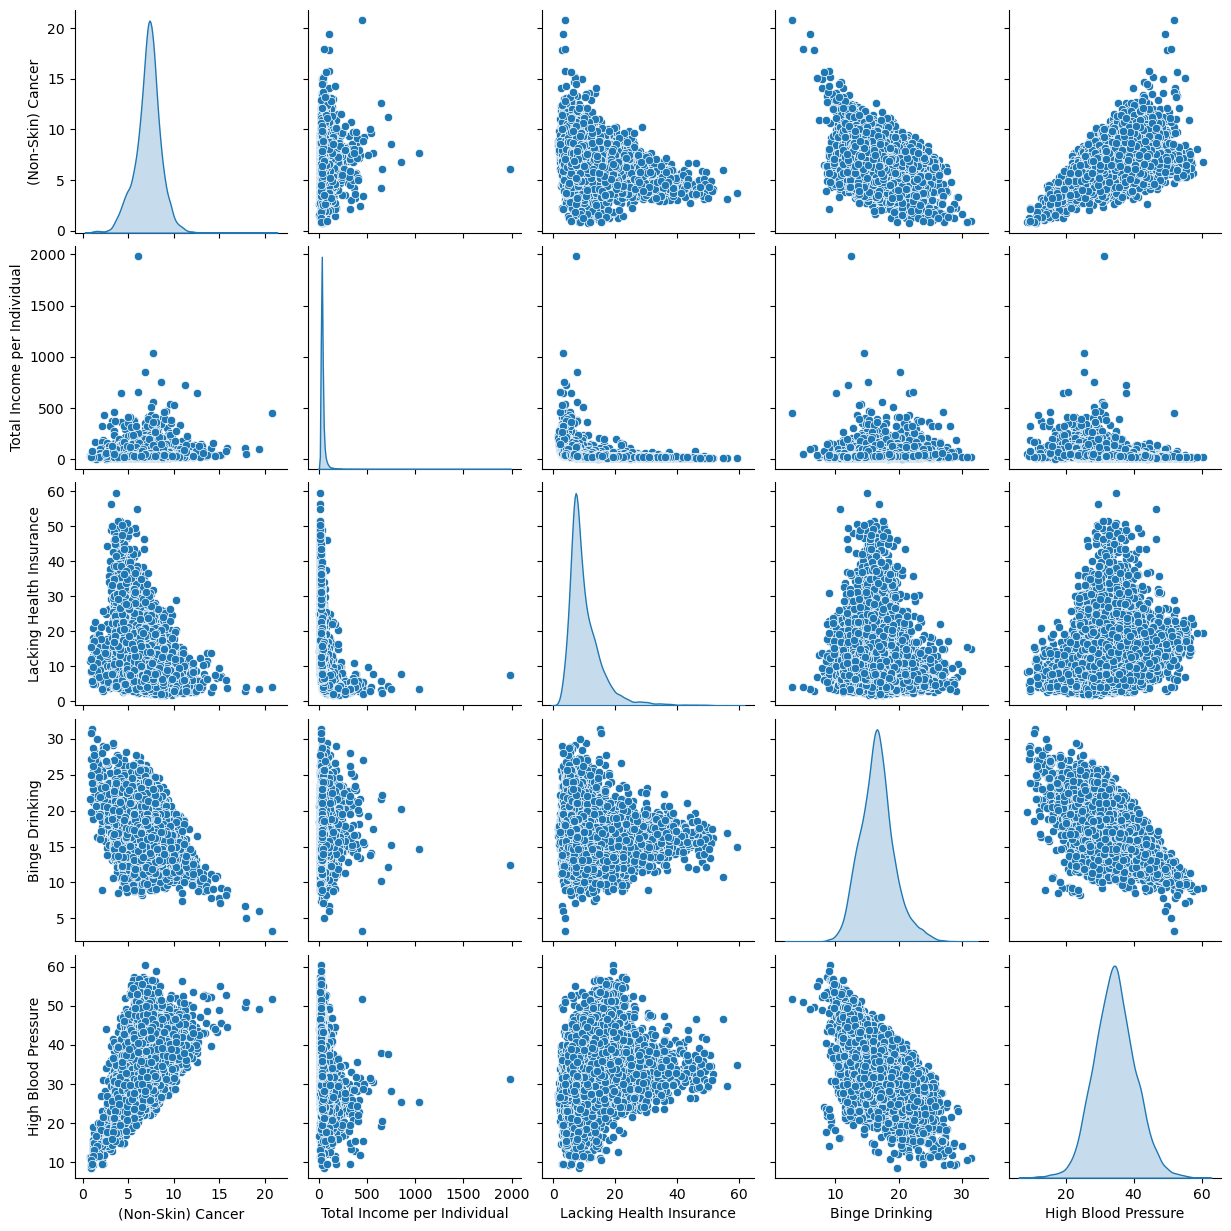

In [10]:
#Inspecting data 

sns.pairplot(train_dataset[['(Non-Skin) Cancer','Total Income per Individual',
'Lacking Health Insurance','Binge Drinking','High Blood Pressure']], diag_kind='kde')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
(Non-Skin) Cancer,21347.0,7.166000,1.439172,0.800000,6.400000,7.30000,8.000000,20.800000
Total Income per Individual,21347.0,38.448158,33.853274,4.121429,25.893261,31.47457,40.249517,1980.466887
Lacking Health Insurance,21347.0,10.224669,5.600154,1.700000,6.800000,8.60000,12.200000,59.600000
Binge Drinking,21347.0,16.593554,2.720517,3.200000,14.800000,16.50000,18.100000,31.400000
High Blood Pressure,21347.0,34.377290,6.158767,8.600000,30.300000,34.30000,38.300000,60.400000
Routine Health Checkups,21347.0,73.896065,5.004122,49.100000,71.700000,75.00000,77.200000,93.000000
Currently Smoking,21347.0,17.893653,4.887682,2.800000,14.700000,17.80000,21.000000,46.300000
Dentist Visits,21347.0,62.195067,8.652366,27.100000,56.400000,63.10000,68.300000,84.000000
Depression,21347.0,22.546288,3.467845,8.300000,20.400000,22.60000,24.800000,37.700000
High Cholesterol,21347.0,36.000506,3.874429,12.400000,33.700000,36.10000,38.500000,54.700000


## Splitting features from labels

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('(Non-Skin) Cancer')
test_labels = test_features.pop('(Non-Skin) Cancer'	)

In [ ]:
#Normalization of Data 
train_dataset.describe().transpose()[["mean","std"]]

,mean,std
(Non-Skin) Cancer,7.166000,1.439172
Total Income per Individual,38.448158,33.853274
Lacking Health Insurance,10.224669,5.600154
Binge Drinking,16.593554,2.720517
High Blood Pressure,34.377290,6.158767
Routine Health Checkups,73.896065,5.004122
Currently Smoking,17.893653,4.887682
Dentist Visits,62.195067,8.652366
Depression,22.546288,3.467845
High Cholesterol,36.000506,3.874429


In [ ]:
#Data Normalization 
normalizer = tf.keras.layers.Normalization(axis=-1)

NameError: name 'tf' is not defined

In [ ]:
#Fitting state of preprocessing layer to the data by calling Normalization.adapt
normalizer.adapt(np.array(train_features))

In [ ]:
#Calculating the mean and varience and store them in a layer, when layer is called, it returns the input data, with each feature indepen normalized 
print(normalizer.mean.numpy())

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress = True):
    print('First example:' first)
    print()
    print('Normalized: ' , normalizer(first).numpy())

## Linear Regression 

In [ ]:
total_income_per_individual_lr = np.array(train_features['Total Income per Individual'])

total_income_per_individual_lr_normalizer = layers.Normalization(input_shape=[1,], axis=None)
total_income_per_individual_lr_normalizer.adapt('Total Income per Individual')

In [ ]:
#Build the Keras Sequential model, model will predict cancer rate from total income per individual 

total_income_per_individual_lr_model = tf.kera.Sequential([
    total_income_per_individual_lr_normalizer,
    layers.Dense(units=1)
])
total_income_per_individual_lr_model.summary()

In [ ]:
total_income_per_individual_lr_model.predict(total_income_per_individual_lr[:10])

In [ ]:
#Compiling loss and optimizer
total_income_per_individual_lr_model.complile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [ ]:
#Fittiing model 
history = total_income_per_individual_lr_model.fit(
    train_features['total_income_per_individual_lr'],
    train_labels,
    epochs=100,
    verbose=0,
    #Calculating vallidation results on 20% of the training data 
    validation_split = 0.2)


In [ ]:
#Visualizing history 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(history)


In [ ]:
#Collecting results to save for later 
test_results = {}

test_results['total_income_per_individual_lr_model'] = total_income_per_individual_lr_model.evaluate(
    test_features["total_income_per_individual_lr_model"],
    test_labels, verbose=0
)

In [ ]:
x = tf.linespace(0.0,250,251)
y = total_income_per_individual_lr_model.predict(x)

In [ ]:
def plot_total_income_per_individual_lr(x,y):
    plt.scatter(train_features['total_income_per_individual_lr'], train_labels,label='Data')
    plt.plot(x,y,color='k',label='Predictions')
    plt.xlabel('Total Income Per Individual')
    plt.ylabel(('Cancer Rate'))

In [ ]:
plot_total_income_per_individual_lr (x,y)

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
# When Model.predict is call on batch of inputs, it produces units=1 outputs for each example 
linear_model.predict(train_features)[:10]

In [ ]:
#When model is called, its weighted matrices will be built-check that the kernal weights(the m in y = mx + b) have a shape of (9,1)
linear_model.layers[1].kernel

In [ ]:
#Configuring moel with Keras Model.compile and train with Model.fit for 100 epochs
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## Regression with a deep neural network (DNN)


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

## Regression using a DNN and multiple inputs

In [ ]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
plot_loss(history)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

## Performance

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [Cancer Risk]']).T

## Make predictions

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error ')
_ = plt.ylabel('Count')

In [ ]:
dnn_model.save('dnn_model')


In [ ]:
## Reloading the model gives you an identical output 
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
#Comparing all models again 
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T
